In [47]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import tensorflow as tf
import os
from PIL import Image
import kaggle
from sklearn.model_selection import train_test_split
from tensorflow import keras


In [ ]:
# DOWNLOAD THE DATASET
# Computer must have a unique kaggle.json file downloaded and have this path: "C:\Users\youruser\.kaggle\kaggle.json"

dataset_name = 'samithsachidanandan/human-face-emotions'
target_folder = 'human-face-emotions'

kaggle.api.dataset_download_files(dataset_name, path=target_folder, unzip=True)
print("Download complete!")

In [2]:
data_dir = './human-face-emotions/data'

In [ ]:
# Removing images exceeding 48x48 size as a robust way of getting rid of images containing...
# full body or multiple people
base_folder = data_dir
summary = {}
total_removed = 0
total_kept = 0

for label in os.listdir(base_folder):
    class_path = os.path.join(base_folder, label)
    removed = 0
    kept = 0

    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)

        try:
            img = Image.open(img_path)
            w, h = img.size
            img.close()

            if (w, h) != (48, 48):
                os.remove(img_path)
                removed += 1
            else:
                kept += 1

        except: # unreadable: close or remove
            try:
                img.close()
            except:
                pass
            os.remove(img_path)
            removed += 1
      

    summary[label] = {"removed": removed, "kept": kept}
    total_removed += removed
    total_kept += kept

print("=== Removal Report by Class ===")
for label, stats in summary.items():
    print(f"{label}: removed {stats['removed']}, kept {stats['kept']}")

print("\n=== TOTAL ===")
print("Total removed:", total_removed)
print("Total kept:", total_kept)

## Model comparison

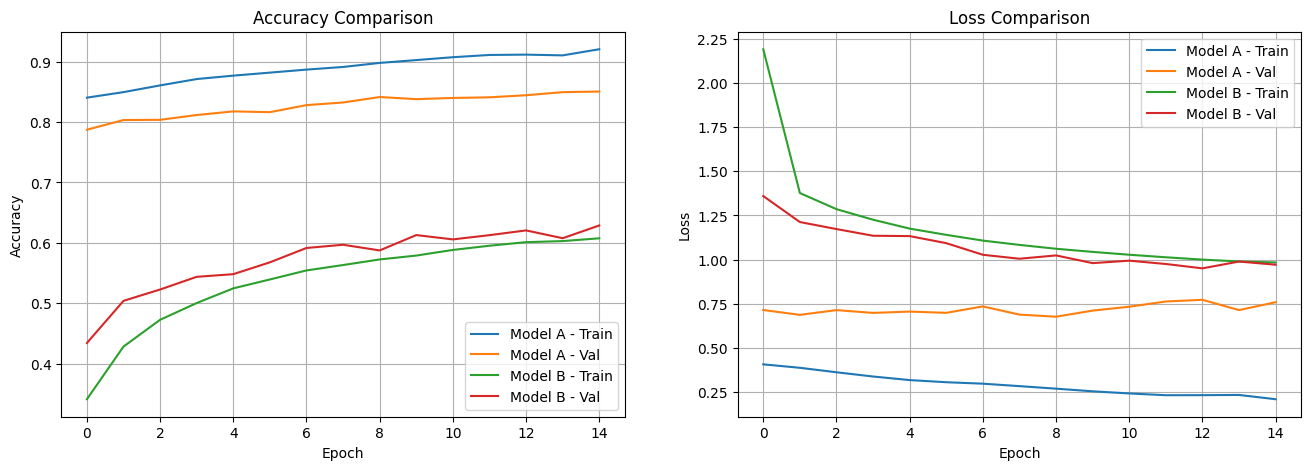

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))

ax1.plot(history_1.history['accuracy'], label='Model A - Train')
ax1.plot(history_1.history['val_accuracy'], label='Model A - Val')
ax1.plot(history.history['accuracy'], label='Model B - Train')
ax1.plot(history.history['val_accuracy'], label='Model B - Val')
ax1.set_title('Accuracy Comparison')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid()

ax2.plot(history_1.history['loss'], label='Model A - Train')
ax2.plot(history_1.history['val_loss'], label='Model A - Val')
ax2.plot(history.history['loss'], label='Model B - Train')
ax2.plot(history.history['val_loss'], label='Model B - Val')
ax2.set_title('Loss Comparison')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid()

plt.show()